In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

In [8]:
%cd keras-retinanet/



[Errno 2] No such file or directory: 'keras-retinanet/'
/home/karki/Desktop/Untitled Folder/keras-retinanet


In [9]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [3]:


import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas

In [14]:
import os
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas

ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

annotations = []
classes = set([])
DATASET_DIR='/home/karki/Desktop/Untitled Folder/citycenterfocussed500by500/'
for xml_file in [f for f in os.listdir(DATASET_DIR) if f.endswith(".xml")]:
  tree = ET.parse(os.path.join(DATASET_DIR, xml_file))
  root = tree.getroot()

  file_name = None

  for elem in root:
    if elem.tag == 'filename':
      file_name = os.path.join(DATASET_DIR, elem.text)

    if elem.tag == 'object':
      obj_name = None
      coords = []
      for subelem in elem:
        if subelem.tag == 'name':
          obj_name = subelem.text
        if subelem.tag == 'bndbox':
          for subsubelem in subelem:
            coords.append(subsubelem.text)
      item = [file_name] + coords + [obj_name]
      annotations.append(item)
      classes.add(obj_name)

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes):
    f.write('{},{}\n'.format(line,i))

In [15]:
!keras_retinanet/bin/debug.py csv annotations.csv classes.csv

Using TensorFlow backend.
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflo

In [19]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform  --weights snapshots/resnet50_coco_best_v2.1.0.h5 --batch-size 8 --steps 500 --epochs 10 --snapshot-path snapshot/ --tensorboard-dir logs/ csv annotations.csv classes.csv

Using TensorFlow backend.
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflo

2019-12-05 11:19:18.328378: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d71afc4e50 executing computations on platform CUDA. Devices:
2019-12-05 11:19:18.328392: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input




Epoch 1/10
2019-12-05 11:19:25.910300: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudnn.so.7
500/500 [==============================] - 663s 1s/step - loss: 3.5725 - regression_loss: 2.6562 - classification_loss: 0.9162

Epoch 00001: saving model to snapshot/resnet50_csv_01.h5

Epoch 2/10
500/500 [==============================] - 659s 1s/step - loss: 2.9060 - regression_loss: 2.2756 - classification_loss: 0.6305

Epoch 00002: saving model to snapshot/resnet50_csv_02.h5
Epoch 3/10
500/500 [==============================] - 666s 1s/step - loss: 2.3946 - regression_loss: 1.8936 - classification_loss: 0.5010

Epoch 00003: saving model to snapshot/resnet50_csv_03.h5
Epoch 4/10
500/500 [==============================] - 675s 1s/step - loss: 2.0319 - regression_loss: 1.6104 - classification_loss: 0.4215

Epoch 00004: saving model to snapshot/resnet50_csv_04.h5
Epoch 5/10
500/500 [==============================] - 693s 1s/step - l

In [17]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights snapshots/resnet50_csv_12_inference.h5 --batch-size 8 --steps 500 --epochs 10 csv annotations.csv classes.csv

Using TensorFlow backend.
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflo

In [20]:
THRES_SCORE = 0.8
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())


Using TensorFlow backend.
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflo

In [11]:
#!keras_retinanet/bin/convert_model.py snapshots/resnet50_csv_10.h5 snapshots/resnet50_csv_12_inference.h5 


In [21]:
model_path = os.path.join('snapshot', sorted(os.listdir('snapshot'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')


snapshot/resnet50_csv_10.h5

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [22]:
model = models.convert_model(model)
CLASSES_FILE = 'classes.csv'
# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv(CLASSES_FILE,header=None).T.loc[0].to_dict()

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


In [23]:

# load label to names mapping for visualization purposes
labels_to_names

{0: 'crossroad', 1: 'Unknown'}

In [22]:
! /home/karki/Desktop/anchor-optimization-master/optimize_anchors.py "/home/karki/Desktop/Untitled Folder/keras-retinanet/annotations.csv" --ratios=5 --no-resize

/usr/bin/sh: 1: /home/karki/Desktop/anchor-optimization-master/optimize_anchors.py: Permission denied


In [104]:
def img_inference(img_path):
  image = read_image_bgr(img_path)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
        
      if score < 0.6:
          break
      
    
      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()
    

processing time:  0.11381292343139648


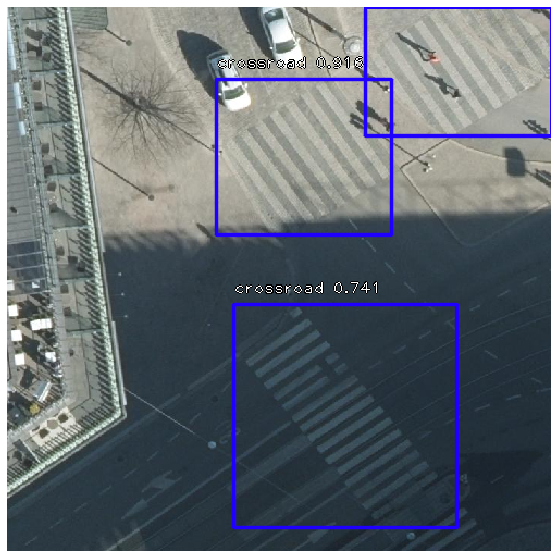

In [105]:
img_inference("/home/karki/Desktop/Untitled Folder/citycenterfocussed500by500/center_9.png")

In [49]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join("")

# load retinanet model
model = models.load_model("/home/karki/Desktop/Untitled Folder/keras-retinanet/snapshots/resnet50_csv_12_inference.h5"
, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'bicycle' }

tracking <tf.Variable 'Variable_15:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_16:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_17:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_18:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_19:0' shape=(9, 4) dtype=float32> anchors


In [43]:
! keras_retinanet/bin/convert_model.py snapshot/resnet50_csv_10.h5 snapshots/resnet50_csv_12_inference.h5 


Using TensorFlow backend.
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/karki/anaconda3/lib/python3.7/site-packages/tensorflo

In [1]:
# load image
image = read_image_bgr('/home/karki/Desktop/person.jpeg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.1:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

NameError: name 'read_image_bgr' is not defined